In [62]:
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf 
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

df = pd.read_csv('test.csv')
z_scores = np.abs(stats.zscore(df['walking_speed']))
df = df[(z_scores < 3)]

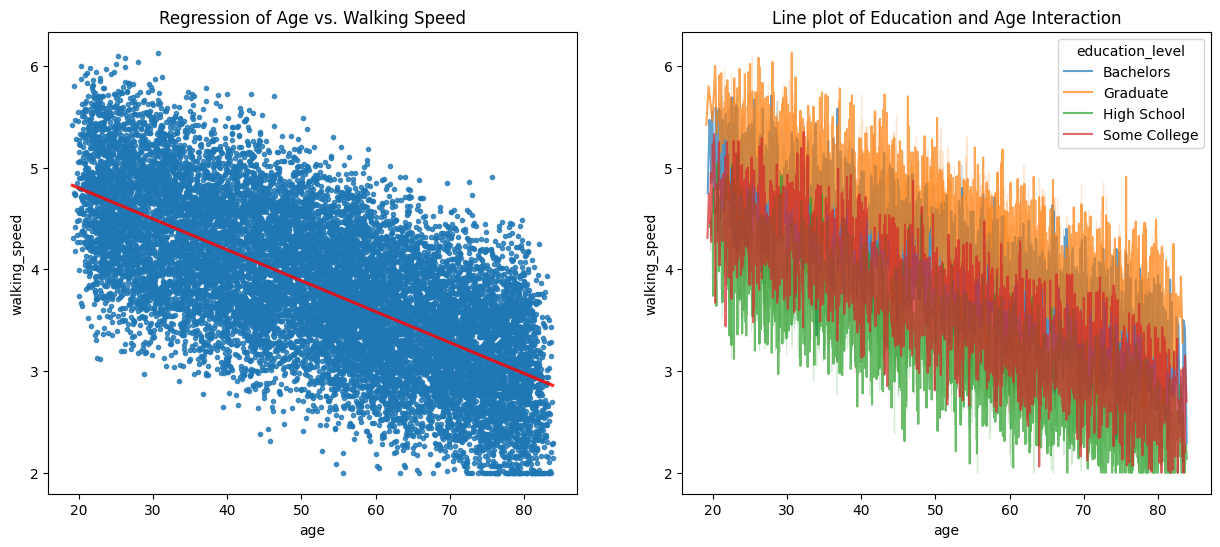

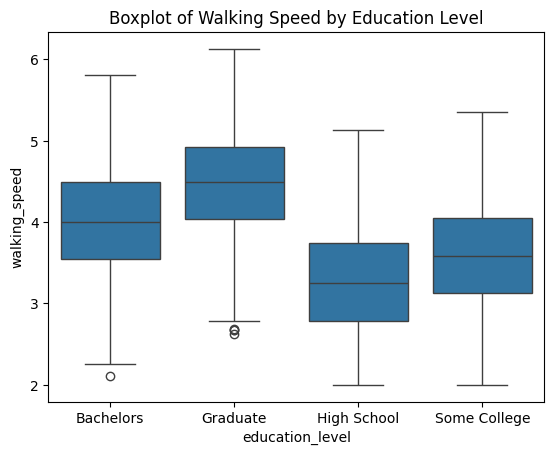

In [64]:
# 1. Walking speed analysis:
#    - Scatter plot of age vs walking speed with regression line
#    - Box plots by education level
#    - Line plot showing education age interaction

# sns.lmplot(data=df, x='age', y='walking_speed', scatter_kws={'marker': '.', 'alpha': 0.5}, line_kws={'color': 'r', 'alpha': 0.8})

fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.regplot(data=df, x='age', y='walking_speed', marker = '.', line_kws=dict(color="r", alpha=0.8), ax=axs[0])
axs[0].set_title("Regression of Age vs. Walking Speed")
sns.lineplot(data=df, x='age', y='walking_speed', ax=axs[1], hue='education_level', alpha=0.7)
axs[1].set_title("Line plot of Education and Age Interaction")
plt.show()

sns.boxplot(x='education_level', y='walking_speed', data=df)
plt.title("Boxplot of Walking Speed by Education Level")
plt.show()

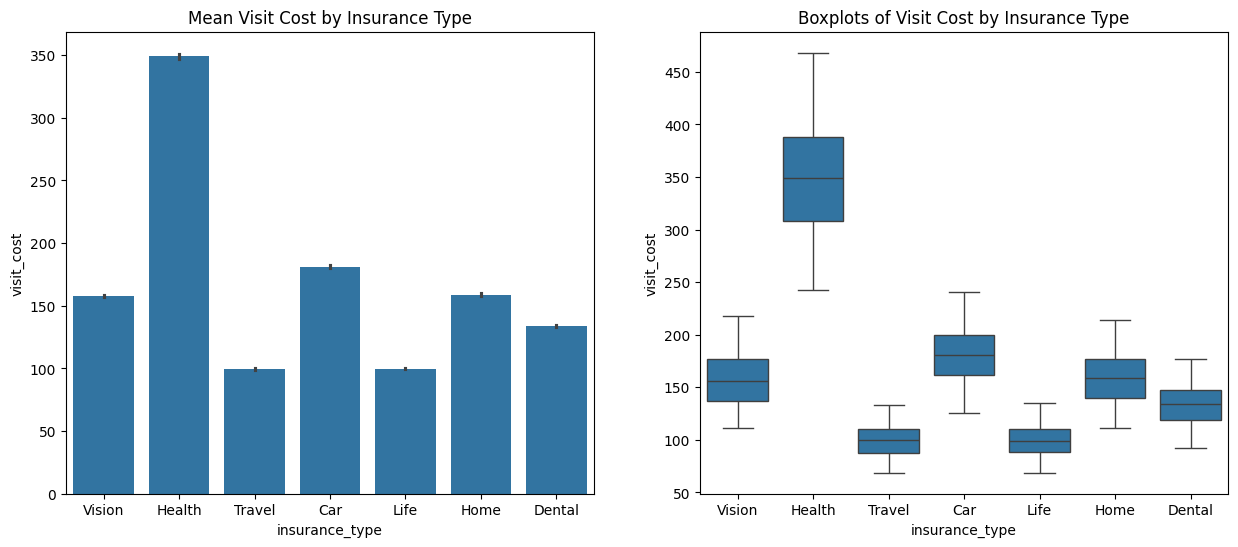

In [65]:
# 2. Cost analysis:
#    - Bar plot of mean costs by insurance type
#    - Box plots showing cost distributions
#    - Add error bars or confidence intervals

fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.barplot(x='insurance_type', y='visit_cost', data=df, errorbar=("ci", 95), ax=axs[0])
axs[0].set_title("Mean Visit Cost by Insurance Type")
sns.boxplot(x='insurance_type', y='visit_cost', data=df, ax=axs[1])
axs[1].set_title("Boxplots of Visit Cost by Insurance Type")
plt.show()

/var/folders/0l/640xm_yn2w556z2zpq4lgkth0000gn/T/ipykernel_90014/3206900973.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_cost = cost_series.resample('M').mean()


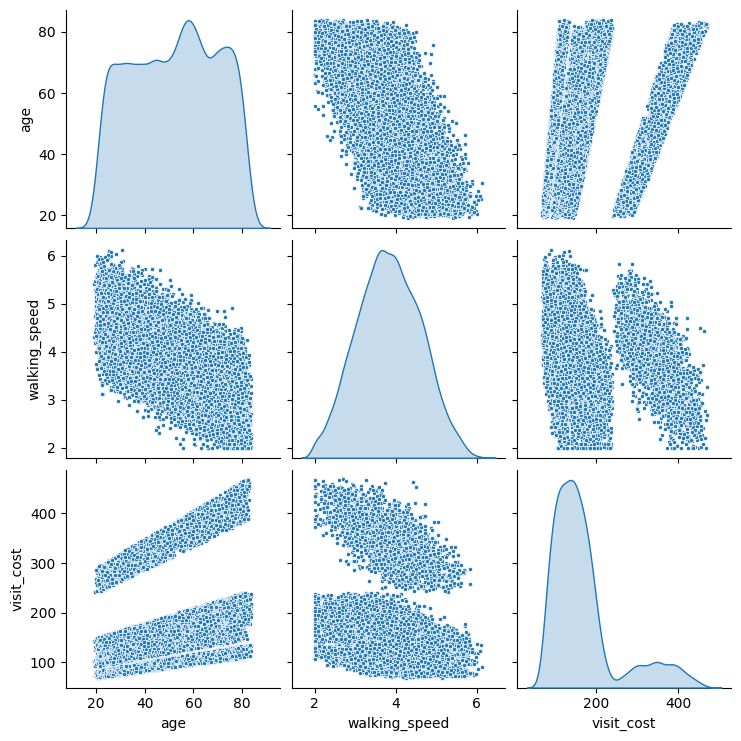

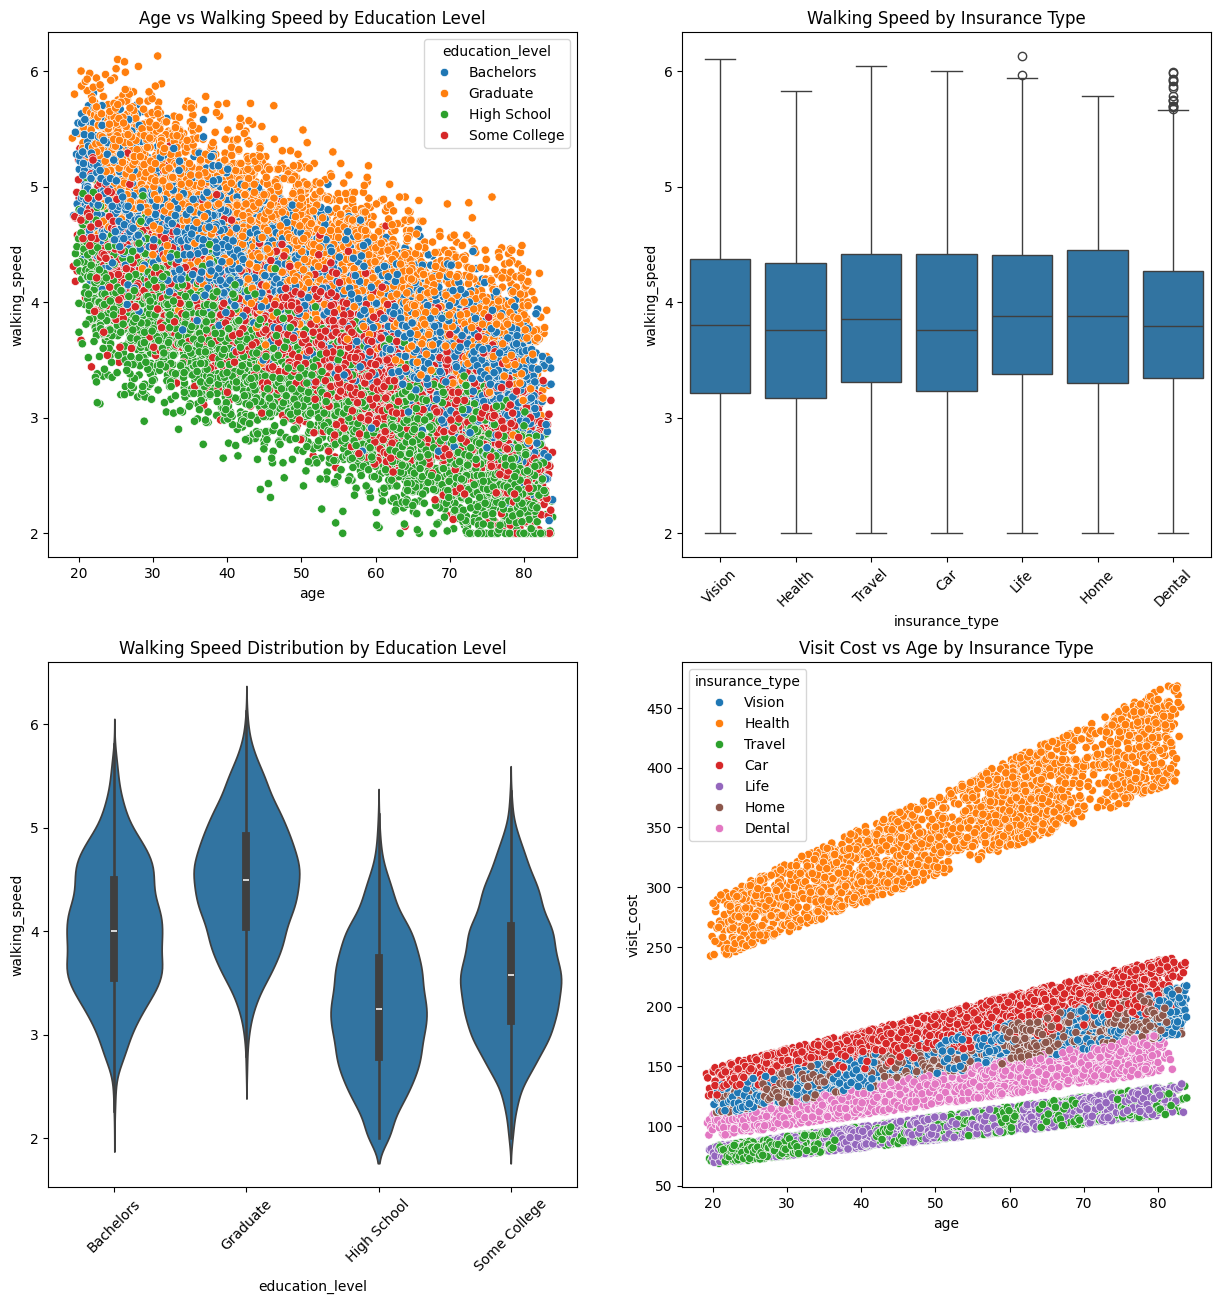

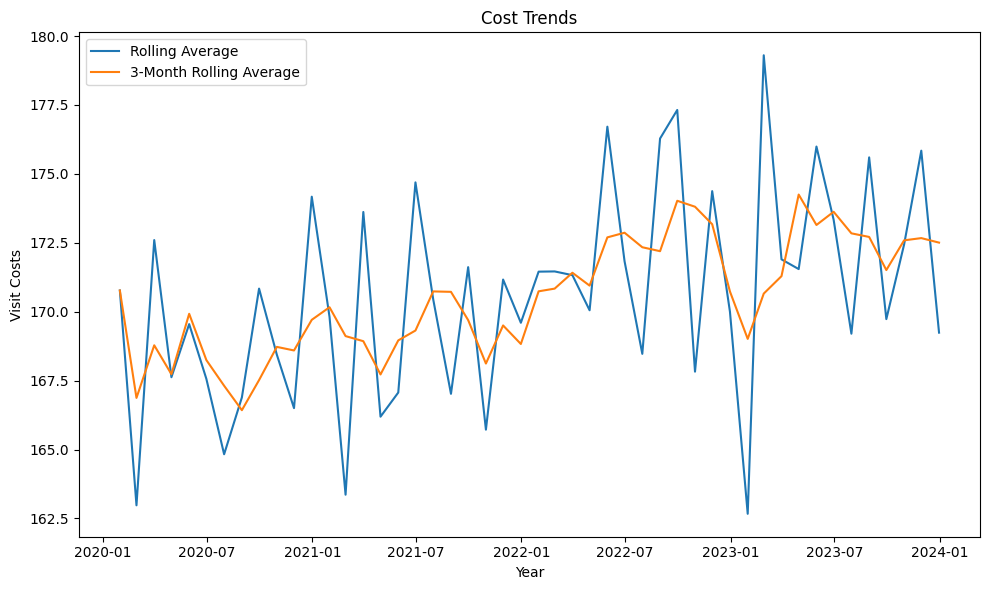

In [76]:
# 3. Combined visualizations:
#    - Pair plot of key variables
#    - Faceted plots by education/insurance
#    - Time trends where relevant

sns.pairplot(df, markers='.',  diag_kind='kde')

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Age vs Walking Speed by Education Level
sns.scatterplot(data=df, x='age', y='walking_speed', hue='education_level', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Walking Speed by Education Level')

# Wwalking Speed by Insurance Type
sns.boxplot(data=df, x='insurance_type', y='walking_speed', ax=axes[0, 1])
axes[0, 1].set_title('Walking Speed by Insurance Type')
axes[0, 1].tick_params(axis='x', rotation=45)

# Walking Speed by Education Level
sns.violinplot(data=df, x='education_level', y='walking_speed', ax=axes[1, 0])
axes[1, 0].set_title('Walking Speed Distribution by Education Level')
axes[1, 0].tick_params(axis='x', rotation=45)

# Visit Cost vs Age by Insurance Type
sns.scatterplot(data=df, x='age', y='visit_cost', hue='insurance_type', ax=axes[1, 1])
axes[1, 1].set_title('Visit Cost vs Age by Insurance Type')

longitudinal_df = df.copy()
longitudinal_df['visit_date'] = pd.to_datetime(longitudinal_df['visit_date'], format='%Y-%m-%d')
cost_series = longitudinal_df.set_index('visit_date')['visit_cost']

cost_series = cost_series.groupby(level=0).mean() #take mean of duplicated days
cost_series = cost_series.interpolate()  # fill missing values

month_cost = cost_series.resample('M').mean()
month_cost = month_cost.interpolate()
month_cost_smooth = month_cost.rolling(window=3, min_periods=1).mean()
ewm_bp = cost_series.ewm(span=30).mean() #give more weight to recent observations for 30-day span

plt.figure(figsize=(10, 6))
plt.plot(month_cost, label='Rolling Average')
plt.plot(month_cost_smooth, label='3-Month Rolling Average')
plt.xlabel('Year')
plt.ylabel('Visit Costs')
plt.title('Cost Trends')
plt.legend()

plt.tight_layout()
plt.show()
